In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, GroupKFold, GridSearchCV, StratifiedKFold

In [2]:
train = pd.read_csv(r'C:\Users\BIS_COM\data\train\HR\aug_train.csv')
test = pd.read_csv(r'C:\Users\BIS_COM\data\train\HR\aug_test.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
train.describe(include='O')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [5]:
obj = [ x for x in train.columns if train[x].dtypes == 'O']
num = [ x for x in train.columns if train[x].dtypes in ['int64','float64']]
print('obj_columns : {}, \n num_columns : {}'.format(obj, num))

obj_columns : ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job'], 
 num_columns : ['enrollee_id', 'city_development_index', 'training_hours', 'target']


In [6]:
del train['enrollee_id']
del test['enrollee_id']
# New one
target = train.pop('target')

print(train.shape, test.shape)

(19158, 12) (2129, 12)


In [7]:
target

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

# Missing Value

In [8]:
train.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
dtype: int64

In [9]:
train = train.dropna(subset=['gender'])
train.isnull().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        213
education_level            259
major_discipline          1978
experience                  16
company_size              4313
company_type              4433
last_new_job                74
training_hours               0
dtype: int64

In [10]:
train['enrolled_university'] = train['enrolled_university'].fillna('no_enrollment')
train['education_level'] = train['education_level'].fillna('no_education')
train['major_discipline'] = train['major_discipline'].fillna('No Major')
train['experience'] = train['experience'].fillna('<1')
train['company_size'] = train['company_size'].fillna('<10')
train['company_type'] = train['company_type'].fillna('Other')
train['last_new_job'] = train['last_new_job'].fillna('never')
train.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [11]:
test.isnull().sum()

city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [12]:
test = test.dropna(subset=['gender'])

In [13]:
test['enrolled_university'] = test['enrolled_university'].fillna('no_enrollment')
test['education_level'] = test['education_level'].fillna('no_education')
test['major_discipline'] = test['major_discipline'].fillna('No Major')
test['experience'] = test['experience'].fillna('<1')
test['company_size'] = test['company_size'].fillna('<10')
test['company_type'] = test['company_type'].fillna('Other')
test['last_new_job'] = test['last_new_job'].fillna('never')
test.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

# Label Encoding

In [14]:
for x in obj:
    le=LabelEncoder()
    le.fit(list(train[x].astype('str')) + list(test[x].astype('str')))
    train[x] = le.transform(list(train[x].astype(str))) 
    test[x] = le.transform(list(test[x].astype(str))) 
train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5,0.920,1,0,2,0,5,21,7,3,0,36
1,77,0.776,1,1,2,0,5,6,4,5,4,47
4,50,0.767,1,0,2,2,5,21,4,1,3,8
6,49,0.920,1,0,2,1,3,15,4,1,0,24
7,83,0.762,1,0,2,0,5,4,7,5,4,18


In [15]:
test.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,78,0.827,1,0,0,0,5,19,7,3,0,21
1,5,0.920,0,0,2,0,5,15,7,5,0,98
2,64,0.624,1,1,2,1,3,20,7,5,5,15
3,26,0.827,1,0,2,2,5,2,0,5,0,39
4,5,0.920,1,0,2,0,5,21,3,5,4,72


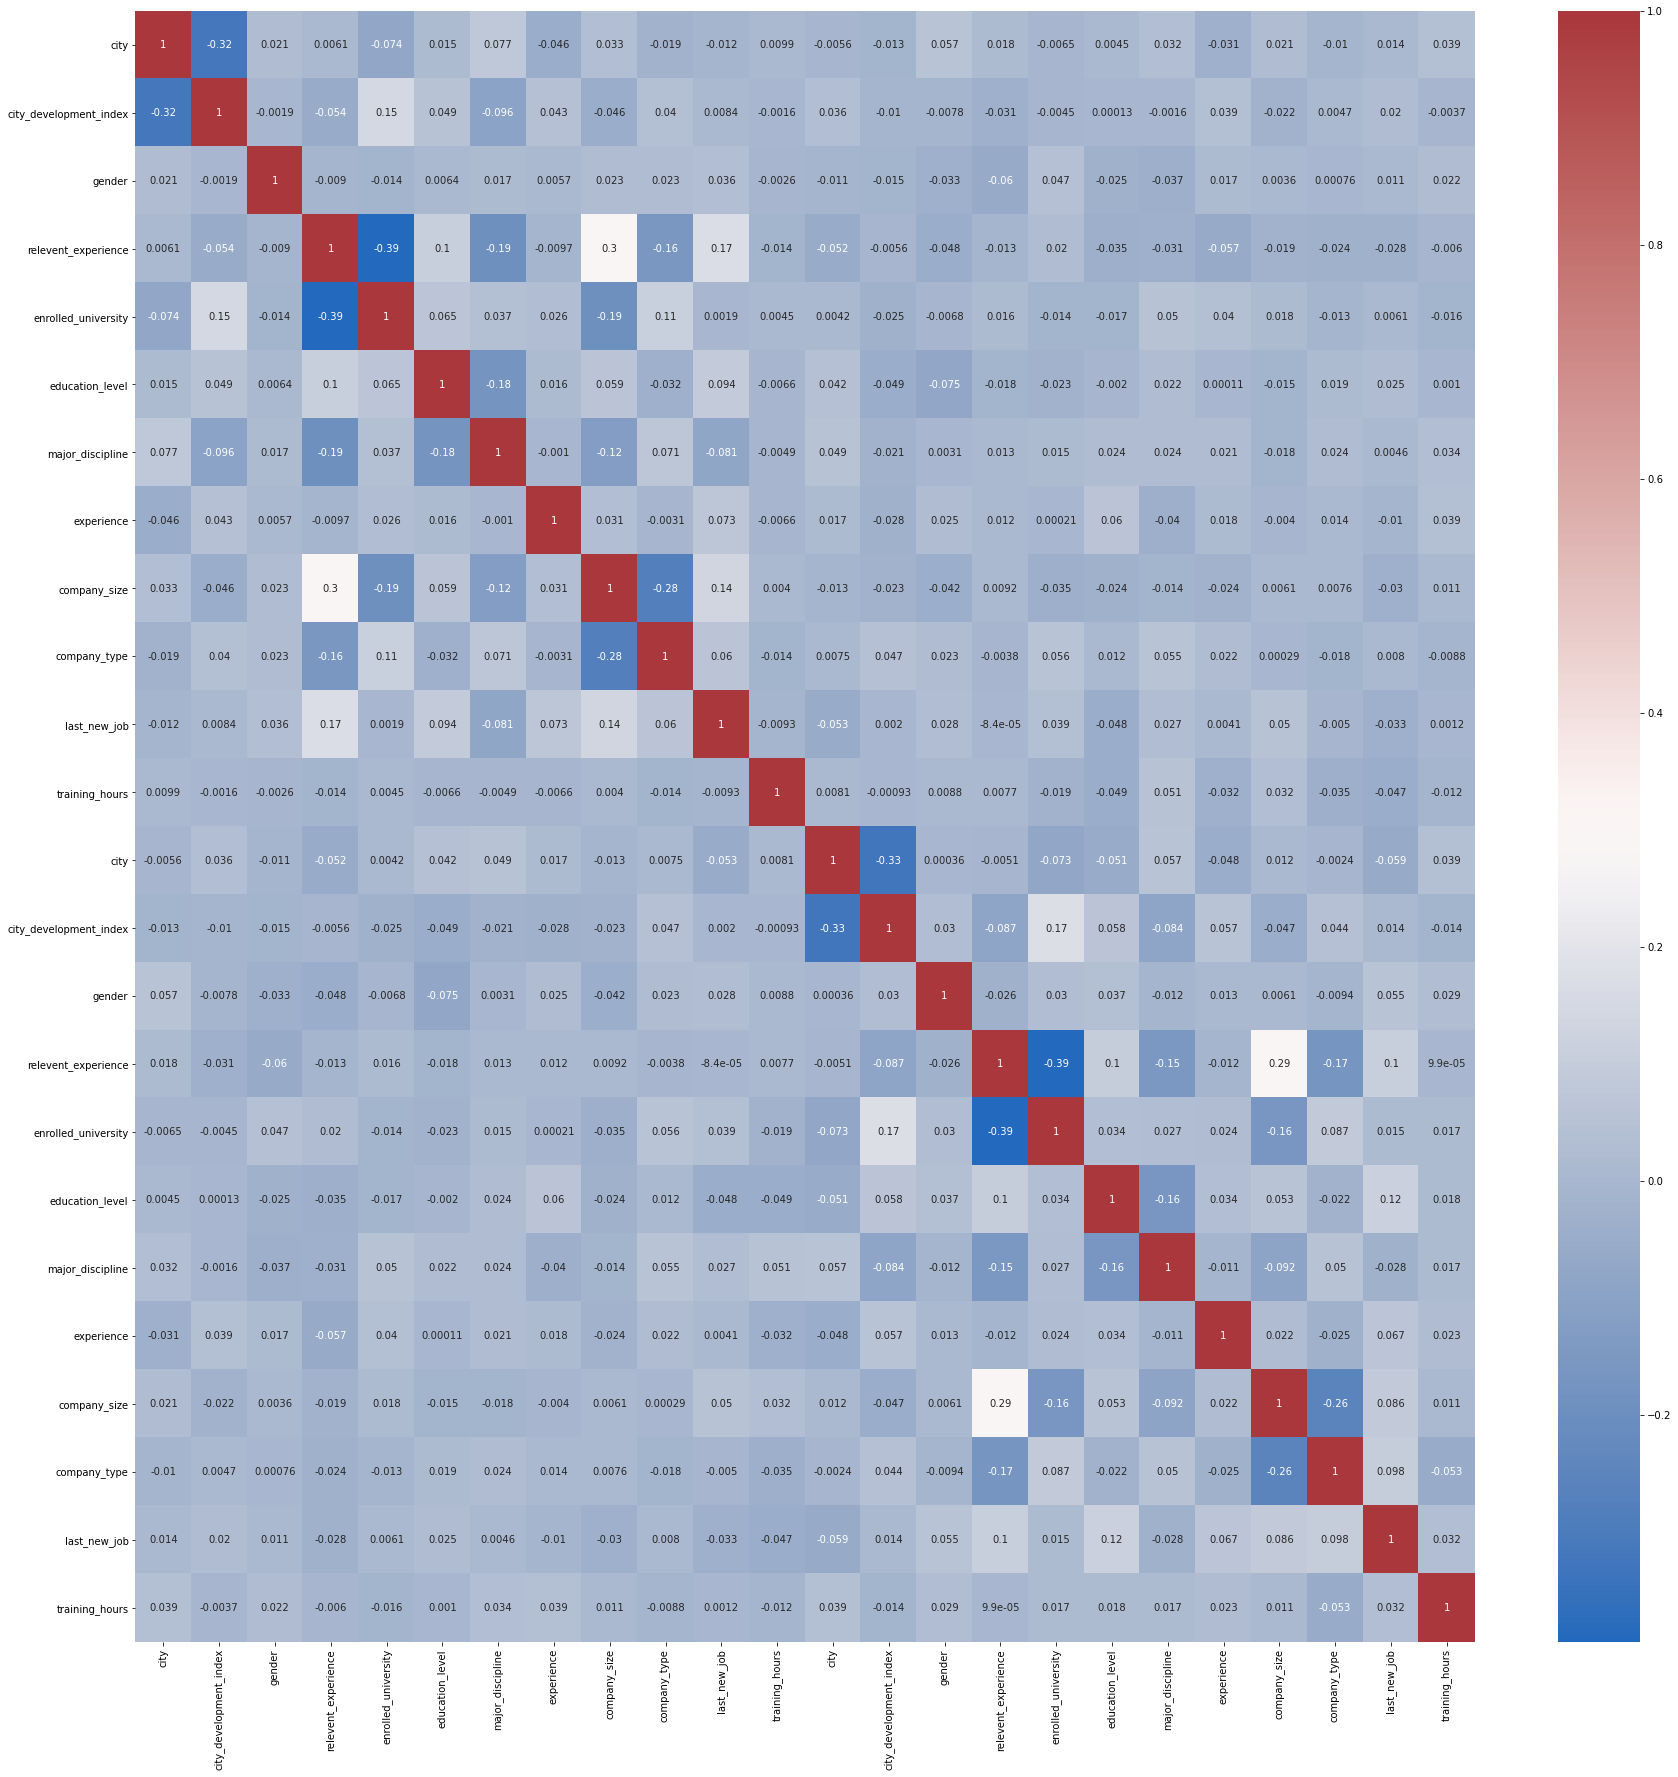

In [16]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.concat([train,test], axis=1).corr(), annot=True, cmap='vlag')

# UpSampling

In [17]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, RandomOverSampler, SMOTENC, SVMSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import ClusterCentroids, TomekLinks, NearMiss, RandomUnderSampler, AllKNN, CondensedNearestNeighbour,NeighbourhoodCleaningRule, OneSidedSelection, RepeatedEditedNearestNeighbours, InstanceHardnessThreshold

In [18]:
smote= SMOTE(sampling_strategy='minority', k_neighbors=5) # used default imblearn parameters


tml = TomekLinks()

In [20]:
print(train.shape, test.shape)

(14650, 12) (1621, 12)


In [19]:
score_auc = []
score_recall = []


oof_rf = np.zeros(len(train))
pred_rf = np.zeros(len(test))

folds = KFold(n_splits=3, shuffle=True, random_state=42)

for fold_ , (train_ind, val_ind) in enumerate(folds.split(train, target)):
    print('fold:', fold_, '  - Starting ...')
    trn_data, val_data = train.iloc[train_ind], train.iloc[val_ind]
    y_train, y_val = target.iloc[train_ind], target.iloc[val_ind]
    
    train_upsample, y_upsample = smote.fit_resample(trn_data, y_train)
    rf = RandomForestClassifier(n_estimators=150, max_depth=5, criterion='gini', max_features=0.8, min_samples_split=5, n_jobs= -1, random_state=32)
    rf.fit(train_upsample, y_upsample)
    
    oof_rf[val_ind] = rf.predict_proba(val_data)[:, 1]
    
    y = rf.predict_proba(train_upsample)[:, 1]
    
    print('val auc:' , roc_auc_score(y_val, oof_rf[val_ind]))
    print('val recall:' , recall_score(y_val, np.where(oof_rf[val_ind] > 0.5, 1, 0)))
    
    score_auc.append(roc_auc_score(y_val, oof_rf[val_ind]))
    score_recall.append(recall_score(y_val, np.where(oof_rf[val_ind] > 0.5, 1, 0)))
            
    
    pred_rf += rf.predict_proba(test)[:, 1]/folds.n_splits
    
print(' Model auc: -------> ', np.mean(score_auc))
print(' Model recall: -------> ', np.mean(score_recall))

ValueError: Found input variables with inconsistent numbers of samples: [14650, 19158]